In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [2]:
input_folder = home_path+"\\save\\4beat_remove\\type2"

In [3]:
test_folder = home_path+"\\pick\\model02\\07\\predict\\01"

In [4]:
random_ecg(100,input_folder,test_folder)

random_ecg


In [5]:
test_data = pd.DataFrame(ecgtodf(test_folder+"\\1_all",289))

100_1557.csv
100_365.csv
100_99.csv
101_1052.csv
101_360.csv
101_899.csv
101_966.csv
103_1106.csv
103_1257.csv
103_1305.csv
103_415.csv
105_1724.csv
105_1729.csv
105_1740.csv
105_1842.csv
105_2352.csv
105_310.csv
105_334.csv
105_36.csv
105_44.csv
105_595.csv
106_1036.csv
106_1386.csv
106_1393.csv
106_1645.csv
106_1649.csv
106_2005.csv
106_208.csv
106_284.csv
106_508.csv
106_922.csv
108_1071.csv
108_1159.csv
108_138.csv
109_1009.csv
109_1722.csv
109_2248.csv
109_758.csv
109_793.csv
111_192.csv
111_2082.csv
111_21.csv
112_132.csv
112_1903.csv
113_1246.csv
113_1302.csv
114_700.csv
114_991.csv
115_1492.csv
116_127.csv
116_426.csv
116_547.csv
116_794.csv
118_1219.csv
118_2011.csv
118_2017.csv
118_243.csv
118_305.csv
118_631.csv
118_668.csv
118_898.csv
118_899.csv
119_1259.csv
119_1417.csv
119_144.csv
119_1474.csv
119_1542.csv
119_177.csv
119_1812.csv
119_1881.csv
119_208.csv
119_297.csv
119_390.csv
119_433.csv
119_453.csv
119_584.csv
119_785.csv
119_803.csv
119_917.csv
119_943.csv
119_958.c

In [6]:
test_data = test_data.sort_values(288)

In [7]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
207,-0.09,-0.08,-0.08,-0.05,-0.025,-0.01,-0.01,-0.01,0.005,0.025,...,-0.235,-0.23,-0.23,-0.25,-0.28,-0.275,-0.255,-0.23,-0.225,F
191,-0.2,-0.19,-0.175,-0.145,-0.135,-0.15,-0.14,-0.11,-0.095,-0.07,...,-0.3,-0.295,-0.31,-0.32,-0.31,-0.295,-0.26,-0.235,-0.225,F
192,0.185,0.18,0.185,0.21,0.245,0.27,0.29,0.27,0.285,0.3,...,0.725,0.865,0.99,1.11,1.215,1.295,1.405,1.54,1.635,F
193,-0.19,-0.2,-0.205,-0.2,-0.18,-0.145,-0.155,-0.14,-0.14,-0.14,...,-0.455,-0.46,-0.455,-0.455,-0.45,-0.46,-0.44,-0.415,-0.395,F
194,0.11,0.125,0.15,0.175,0.18,0.17,0.18,0.19,0.24,0.255,...,-0.22,-0.235,-0.25,-0.245,-0.245,-0.225,-0.225,-0.235,-0.25,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,-0.89,-0.895,-0.915,-0.925,-0.93,-0.945,-0.94,-0.95,-0.955,-0.945,...,-0.505,-0.52,-0.535,-0.545,-0.545,-0.555,-0.55,-0.545,-0.55,V
62,-1.11,-1.115,-1.125,-1.135,-1.12,-1.115,-1.11,-1.11,-1.08,-1.09,...,-1.285,-1.27,-1.255,-1.245,-1.235,-1.25,-1.235,-1.235,-1.24,V
326,-0.295,-0.26,-0.25,-0.225,-0.215,-0.185,-0.165,-0.135,-0.105,-0.08,...,-0.605,-0.615,-0.615,-0.615,-0.62,-0.59,-0.585,-0.575,-0.565,V
339,-0.105,-0.105,-0.095,-0.085,-0.06,-0.045,-0.05,-0.04,-0.05,-0.065,...,-0.285,-0.275,-0.285,-0.275,-0.265,-0.255,-0.275,-0.29,-0.295,V


In [8]:
test_data = test_data.loc[:,:287]

In [9]:
test_data.shape

(415, 288)

In [10]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
207,-0.09,-0.08,-0.08,-0.05,-0.025,-0.01,-0.01,-0.01,0.005,0.025,...,-0.255,-0.235,-0.23,-0.23,-0.25,-0.28,-0.275,-0.255,-0.23,-0.225
191,-0.2,-0.19,-0.175,-0.145,-0.135,-0.15,-0.14,-0.11,-0.095,-0.07,...,-0.32,-0.3,-0.295,-0.31,-0.32,-0.31,-0.295,-0.26,-0.235,-0.225
192,0.185,0.18,0.185,0.21,0.245,0.27,0.29,0.27,0.285,0.3,...,0.59,0.725,0.865,0.99,1.11,1.215,1.295,1.405,1.54,1.635
193,-0.19,-0.2,-0.205,-0.2,-0.18,-0.145,-0.155,-0.14,-0.14,-0.14,...,-0.48,-0.455,-0.46,-0.455,-0.455,-0.45,-0.46,-0.44,-0.415,-0.395
194,0.11,0.125,0.15,0.175,0.18,0.17,0.18,0.19,0.24,0.255,...,-0.235,-0.22,-0.235,-0.25,-0.245,-0.245,-0.225,-0.225,-0.235,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,-0.89,-0.895,-0.915,-0.925,-0.93,-0.945,-0.94,-0.95,-0.955,-0.945,...,-0.49,-0.505,-0.52,-0.535,-0.545,-0.545,-0.555,-0.55,-0.545,-0.55
62,-1.11,-1.115,-1.125,-1.135,-1.12,-1.115,-1.11,-1.11,-1.08,-1.09,...,-1.285,-1.285,-1.27,-1.255,-1.245,-1.235,-1.25,-1.235,-1.235,-1.24
326,-0.295,-0.26,-0.25,-0.225,-0.215,-0.185,-0.165,-0.135,-0.105,-0.08,...,-0.605,-0.605,-0.615,-0.615,-0.615,-0.62,-0.59,-0.585,-0.575,-0.565
339,-0.105,-0.105,-0.095,-0.085,-0.06,-0.045,-0.05,-0.04,-0.05,-0.065,...,-0.28,-0.285,-0.275,-0.285,-0.275,-0.265,-0.255,-0.275,-0.29,-0.295


In [11]:
def to_mixmax_tensor(x):
    
    record = x.to_numpy()
    t_record = record.T

    scaler = MinMaxScaler()
    scaler.fit(t_record)

    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    x=x_tensor_input(record)


    return x

In [12]:
test_data = to_mixmax_tensor(test_data)

In [13]:
print(test_data.shape)

(415, 288, 1)


In [14]:
test_data

array([[[0.12077295],
        [0.12560386],
        [0.12560386],
        ...,
        [0.0410628 ],
        [0.0531401 ],
        [0.05555556]],

       [[0.14933837],
        [0.15311909],
        [0.15879017],
        ...,
        [0.12665406],
        [0.13610586],
        [0.13988658]],

       [[0.22262774],
        [0.22080292],
        [0.22262774],
        ...,
        [0.66788321],
        [0.71715328],
        [0.75182482]],

       ...,

       [[0.35460993],
        [0.36702128],
        [0.37056738],
        ...,
        [0.25177305],
        [0.25531915],
        [0.25886525]],

       [[0.23300971],
        [0.23300971],
        [0.23624595],
        ...,
        [0.17799353],
        [0.17313916],
        [0.17152104]],

       [[0.41847826],
        [0.42572464],
        [0.42753623],
        ...,
        [0.5615942 ],
        [0.5634058 ],
        [0.56884058]]])

In [15]:
test_data.shape

(415, 288, 1)

In [16]:
model = kr.models.load_model(git_path+"\\test\\02\\07\\model02.h5")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 286, 8)            32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 143, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 141, 16)           400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 68, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 34, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 32)            3

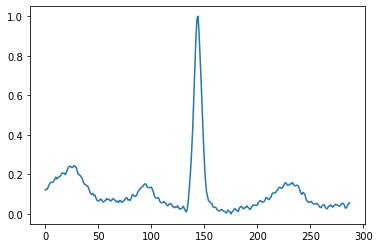

In [18]:
plt.plot(test_data[0])

In [19]:
predict = model.predict(test_data)

In [20]:
print(predict)

[[8.4166182e-03 2.1182201e-05 3.6551942e-11 9.9156219e-01 2.4004500e-20]
 [5.3756236e-04 4.1656211e-04 4.7860752e-08 9.9904579e-01 2.8095522e-18]
 [1.0150694e-02 5.2682281e-04 9.3071100e-07 9.8932159e-01 3.4560761e-15]
 ...
 [5.4458501e-03 2.7652996e-04 9.7342223e-01 2.0855417e-02 2.6650735e-09]
 [1.6663528e-04 2.3347419e-04 9.9873346e-01 8.6639571e-04 4.8977333e-12]
 [4.0920753e-05 2.0500289e-05 9.9992561e-01 1.3011553e-05 3.4825603e-20]]


In [21]:
output = []

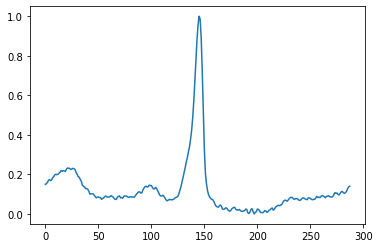

In [22]:
plt.plot(test_data[1])

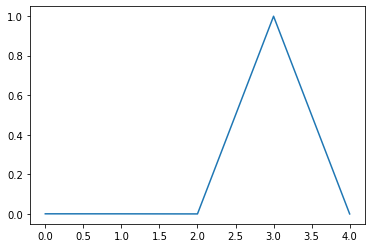

In [23]:
plt.plot(predict[1])

In [24]:
for i in range(len(predict)):
    print(np.argmax(predict[i]))
    output.append(np.argmax(predict[i]))

3
3
3
3
3
0
3
3
3
0
2
3
3
3
3
2
3
0
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
0
3
3
3
3
3
3
3
0
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
3
0
0
4
1
4
2
0
4
4
3
4
0
4
0
0
0
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


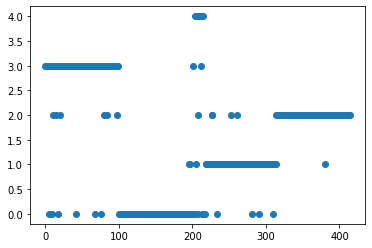

In [25]:
plt.plot(output,"o")

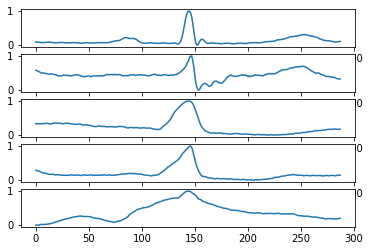

In [26]:
plt.subplot(5,1,1)
plt.plot(test_data[150])
plt.subplot(5,1,2)
plt.plot(test_data[250])
plt.subplot(5,1,3)
plt.plot(test_data[400])
plt.subplot(5,1,4)
plt.plot(test_data[50])
plt.subplot(5,1,5)
plt.plot(test_data[200])


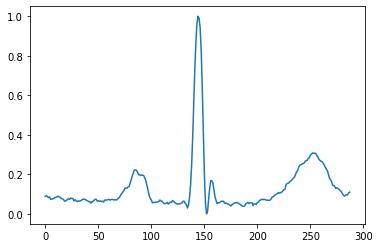

In [27]:
plt.plot(test_data[150])

In [28]:
for i in range(5):
    print(output.count(i))

116
92
111
90
6
